# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Naufal Nur Fahriza
- **Email:** naufalnurfahriza@gmail.com
- **ID Dicoding:** a297ybf370

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?
- Pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Setting untuk visualisasi
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

Mengimpor dataset dari file day.csv

In [3]:
# Gathering Data: Mengimpor dataset dari GitHub
url_day = "https://raw.githubusercontent.com/NaufalNurFahriza/data-analyst-python-dicoding/main/data/day.csv"
df_day = pd.read_csv(url_day)

# Menampilkan 5 baris pertama dataset
display(df_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengimpor dataset dari file hour.csv

In [4]:
url_hour = "https://raw.githubusercontent.com/NaufalNurFahriza/data-analyst-python-dicoding/main/data/hour.csv"
df_hour = pd.read_csv(url_hour)

# Menampilkan 5 baris pertama dataset
display(df_hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data agregat harian dari penyewaan sepeda dengan total 731 baris data
- Dataset hour.csv berisi data yang lebih terperinci dengan pembagian per jam dengan total 17,379 baris data
- Kedua dataset berisi informasi penting seperti tanggal, jam, musim, suhu, dan jumlah penyewaan yang terbagi menjadi pengguna biasa (casual) dan terdaftar (registered)

### Assessing Data

In [5]:
# Memeriksa informasi dataset
print("\nInformasi dataset harian:")
df_day.info()
print("\nInformasi dataset per jam:")
df_hour.info()


Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi dataset per jam:
<class 'pandas.core.frame.DataFra

In [ ]:
# Memeriksa informasi dataset
print("\nInformasi Dataset Harian:")
df_day.info()
print("\nInformasi Dataset Per Jam:")
df_hour.info()

In [6]:
# Memeriksa statistik deskriptif
print("\nStatistik deskriptif dataset harian:")
print(df_day.describe())
print("\nStatistik deskriptif dataset per jam:")
print(df_hour.describe())


Statistik deskriptif dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0

In [7]:
# Cek missing values
print("\nCek nilai yang hilang pada dataset harian:")
print(df_day.isnull().sum())
print("\nCek nilai yang hilang pada dataset per jam:")
print(df_hour.isnull().sum())


Cek nilai yang hilang pada dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek nilai yang hilang pada dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Cek data duplikat
print("\nCek duplikat pada dataset harian:")
print(df_day.duplicated().sum())
print("\nCek duplikat pada dataset per jam:")
print(df_hour.duplicated().sum())


Cek duplikat pada dataset harian:
0

Cek duplikat pada dataset per jam:
0


**Insight:**
- Tidak ada nilai yang hilang pada kedua dataset
- Tidak ada duplikat pada kedua dataset
- Kolom 'dteday' perlu diubah ke format datetime untuk analisis temporal
- Beberapa kolom seperti 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' dan 'weathersit' bersifat kategorikal
- Kolom 'hr' pada dataset hour.csv berisi nilai 0-23 yang menunjukkan jam dalam sehari
- Kolom 'temp', 'atemp', 'hum', dan 'windspeed' sudah dinormalisasi

### Cleaning Data

In [15]:
# Mengubah tipe data kolom 'dteday' ke datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Membuat kolom baru untuk bulan dan tahun
df_day['month'] = df_day['dteday'].dt.month_name()
df_day['year'] = df_day['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month_name()
df_hour['year'] = df_hour['dteday'].dt.year

# Memetakan nilai numerik ke dalam kategori
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

df_day['season_label'] = df_day['season'].map(season_mapping)
df_day['weather_label'] = df_day['weathersit'].map(weather_mapping)
df_day['weekday_label'] = df_day['weekday'].map(weekday_mapping)

df_hour['season_label'] = df_hour['season'].map(season_mapping)
df_hour['weather_label'] = df_hour['weathersit'].map(weather_mapping)
df_hour['weekday_label'] = df_hour['weekday'].map(weekday_mapping)

# Mengubah kolom 'workingday' menjadi lebih deskriptif
df_day['day_type'] = df_day['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})
df_hour['day_type'] = df_hour['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})

# Menambahkan kolom kategori waktu dalam sehari
time_category = {
    0: 'Night', 1: 'Night', 2: 'Night', 3: 'Night', 4: 'Night', 5: 'Night',
    6: 'Morning', 7: 'Morning', 8: 'Morning', 9: 'Morning', 10: 'Morning', 11: 'Morning',
    12: 'Afternoon', 13: 'Afternoon', 14: 'Afternoon', 15: 'Afternoon', 16: 'Afternoon', 17: 'Afternoon',
    18: 'Evening', 19: 'Evening', 20: 'Evening', 21: 'Evening', 22: 'Evening', 23: 'Evening'
}
df_hour['time_of_day'] = df_hour['hr'].map(time_category)

# Menambahkan kolom jam dalam format 24 jam
df_hour['hour_formatted'] = df_hour['hr'].apply(lambda x: f"{x:02d}:00")

# Menampilkan hasil cleaning
print("\nHasil Cleaning Dataset Harian:")
display(df_day[['dteday', 'season_label', 'weather_label', 'day_type']].head())
print("\nHasil Cleaning Dataset Per Jam:")
display(df_hour[['dteday', 'hour_formatted', 'time_of_day', 'day_type']].head())


Hasil cleaning dataset harian:
      dteday  season season_label  weathersit weather_label  workingday  \
0 2011-01-01       1       Winter           2          Mist           0   
1 2011-01-02       1       Winter           2          Mist           0   
2 2011-01-03       1       Winter           1         Clear           1   
3 2011-01-04       1       Winter           1         Clear           1   
4 2011-01-05       1       Winter           1         Clear           1   

          day_type  
0  Weekend/Holiday  
1  Weekend/Holiday  
2      Working Day  
3      Working Day  
4      Working Day  

Hasil cleaning dataset per jam:
      dteday  hr hour_formatted time_of_day season_label         day_type
0 2011-01-01   0          00:00       Night       Winter  Weekend/Holiday
1 2011-01-01   1          01:00       Night       Winter  Weekend/Holiday
2 2011-01-01   2          02:00       Night       Winter  Weekend/Holiday
3 2011-01-01   3          03:00       Night       Winter  Week

**Insight:**
- Data telah diubah ke format yang lebih mudah diinterpretasi dengan label deskriptif
- Penambahan kolom 'time_of_day' memudahkan analisis berdasarkan kategori waktu dalam sehari
- Format datetime memungkinkan analisis berdasarkan bulan, tahun, dan hari dalam seminggu
- Kedua dataset siap untuk analisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
# Untuk pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?
hourly_rentals = df_hour.groupby('hr')['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda per jam:")
print(hourly_rentals.sort_values('cnt', ascending=False).head())
print(hourly_rentals.sort_values('cnt', ascending=True).head())

# Rata-rata penyewaan berdasarkan kategori waktu
time_of_day_rentals = df_hour.groupby('time_of_day')['cnt'].mean().reset_index()
print("\nRata-rata penyewaan berdasarkan kategori waktu:")
print(time_of_day_rentals.sort_values('cnt', ascending=False))

# Pola penggunaan sepeda berdasarkan hari kerja vs akhir pekan
workday_hourly = df_hour.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()
print("\nRata-rata penyewaan per jam berdasarkan tipe hari:")
print(workday_hourly.pivot(index='hr', columns='day_type', values='cnt').head())


Rata-rata penyewaan sepeda per jam:
    hr         cnt
17  17  461.452055
18  18  425.510989
8    8  359.011004
16  16  311.983562
19  19  311.523352
   hr        cnt
4   4   6.352941
3   3  11.727403
5   5  19.889819
2   2  22.869930
1   1  33.375691

Rata-rata penyewaan berdasarkan kategori waktu:
  time_of_day         cnt
0   Afternoon  295.483886
1     Evening  225.757555
2     Morning  208.100688
3       Night   24.908559

Rata-rata penyewaan per jam berdasarkan tipe hari:
day_type  Weekend/Holiday  Working Day
hr                                    
0               90.800000    36.786290
1               69.508696    16.552632
2               53.171053     8.683778
3               25.775330     4.942553
4                8.264317     5.429787


In [17]:
# Untuk pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?
# Korelasi antara suhu dan jumlah penyewaan
temp_corr = df_day[['temp', 'cnt']].corr()
print("\nKorelasi antara suhu dan jumlah penyewaan:")
print(temp_corr)

# Statistik deskriptif untuk suhu
print("\nStatistik deskriptif untuk suhu:")
print(df_day['temp'].describe())

# Membuat kategori suhu untuk analisis lebih lanjut
temp_bins = [0, 0.25, 0.5, 0.75, 1.0]
temp_labels = ['Very Low', 'Low', 'Moderate', 'High']
df_day['temp_category'] = pd.cut(df_day['temp'], bins=temp_bins, labels=temp_labels)

# Rata-rata penyewaan berdasarkan kategori suhu
temp_category_rentals = df_day.groupby('temp_category')['cnt'].mean().reset_index()
print("\nRata-rata penyewaan berdasarkan kategori suhu:")
print(temp_category_rentals)


Korelasi antara suhu dan jumlah penyewaan:
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000

Statistik deskriptif untuk suhu:
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

Rata-rata penyewaan berdasarkan kategori suhu:
  temp_category          cnt
0      Very Low  1703.174603
1           Low  3758.453947
2      Moderate  5647.102894
3          High  5406.792453


<ipython-input-17-deedbc112ba5>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_category_rentals = df_day.groupby('temp_category')['cnt'].mean().reset_index()


**Insight:**
- Jam tersibuk untuk penyewaan sepeda adalah pada jam 17:00 (5 PM) dan 18:00 (6 PM), bertepatan dengan jam pulang kerja
- Jam tersepi adalah dini hari antara jam 3:00-4:00 AM
- Penyewaan sepeda menunjukkan pola bimodal pada hari kerja, dengan puncak di pagi hari (8 AM) dan sore hari (5-6 PM)
- Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda (korelasi = 0.63)
- Penyewaan sepeda meningkat seiring dengan kenaikan suhu, dengan penyewaan tertinggi pada kategori suhu 'High'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?

<ipython-input-21-23a33ee1bded>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=False).head(5),
<ipython-input-21-23a33ee1bded>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=True).head(5),


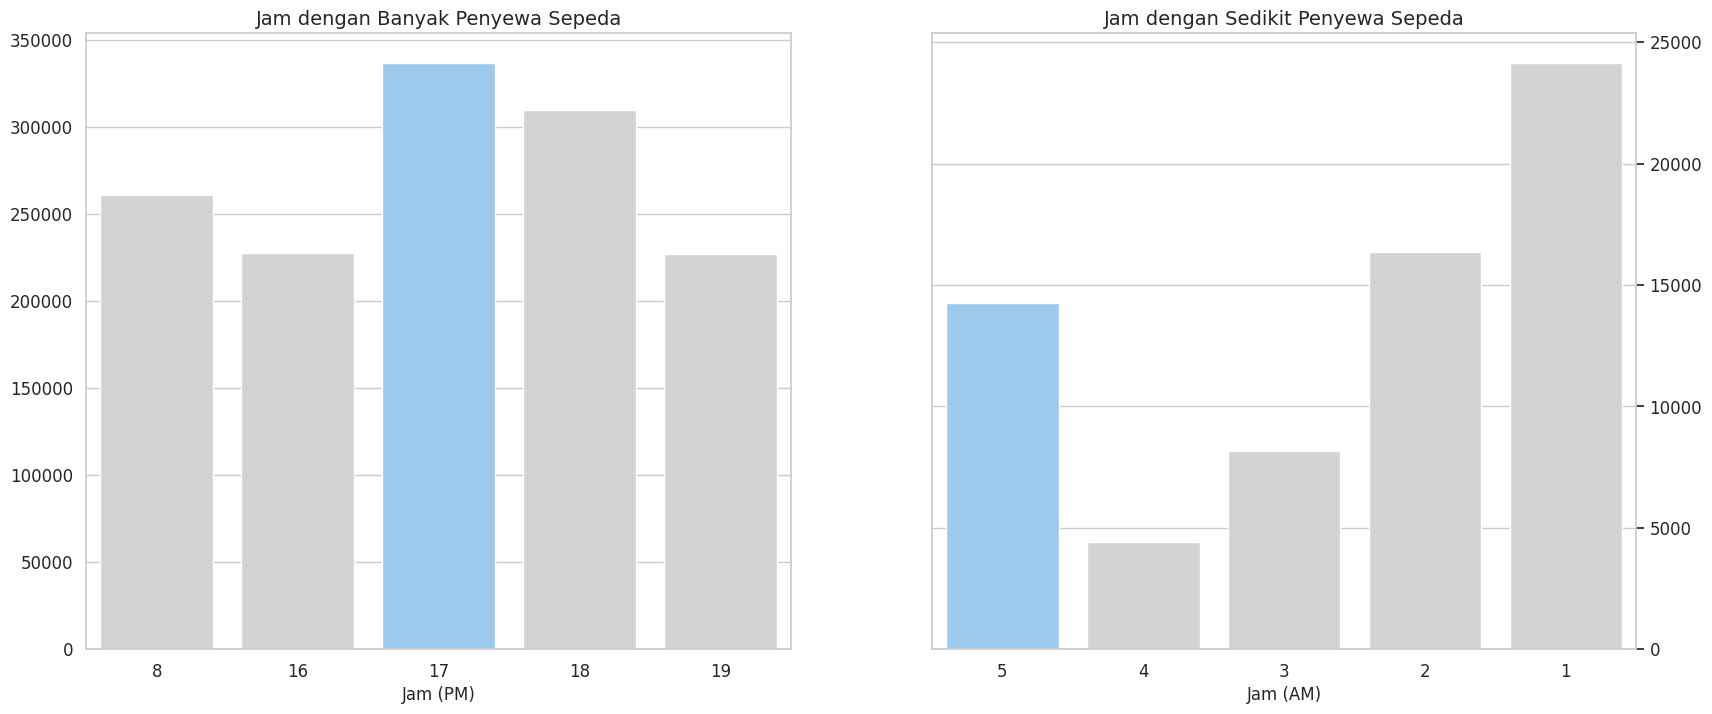

In [21]:
# Pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?
hourly_rentals = df_hour.groupby('hr')['cnt'].sum().reset_index()

# Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Barplot untuk jam dengan penyewaan terbanyak
sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=False).head(5),
            palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jam (PM)", fontsize=12)
ax[0].set_title("Jam dengan Banyak Penyewa Sepeda", loc="center", fontsize=14)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

# Barplot untuk jam dengan penyewaan terdikit
sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=True).head(5),
            palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9"], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jam (AM)", fontsize=12)
ax[1].set_title("Jam dengan Sedikit Penyewa Sepeda", loc="center", fontsize=14)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

plt.show()

### Pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?

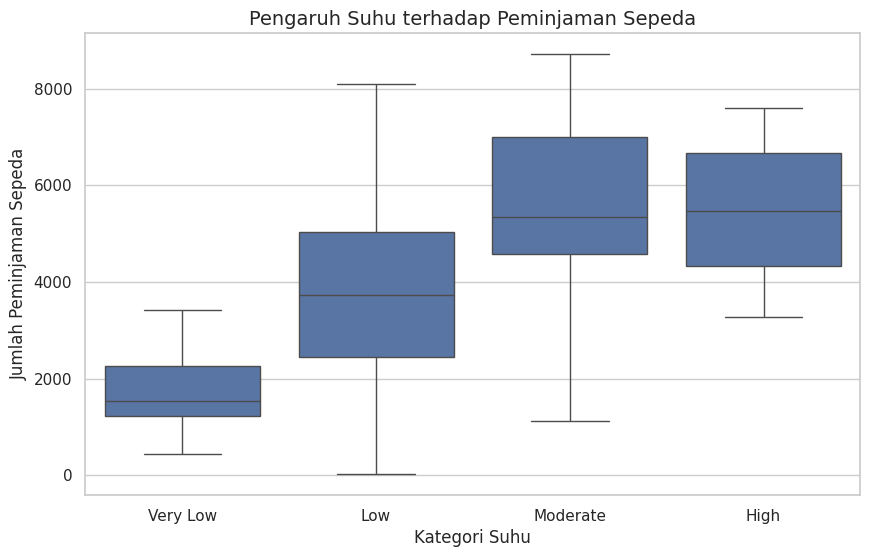

In [22]:
# Pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?
# Membuat kategori suhu
temp_bins = [0, 0.25, 0.5, 0.75, 1.0]
temp_labels = ['Very Low', 'Low', 'Moderate', 'High']
df_day['temp_category'] = pd.cut(df_day['temp'], bins=temp_bins, labels=temp_labels)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(x="temp_category", y="cnt", data=df_day)
plt.title("Pengaruh Suhu terhadap Peminjaman Sepeda", fontsize=14)
plt.xlabel("Kategori Suhu", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Berdasarkan analisis, jam 17:00 (5 PM) merupakan waktu tersibuk untuk penyewaan sepeda, yang kemungkinan besar disebabkan oleh aktivitas pulang kerja. Sedangkan jam 4:00 (4 AM) adalah waktu tersepi, dengan rata-rata hanya 6 penyewaan per jam. Pola penyewaan menunjukkan dua puncak pada hari kerja (pagi dan sore) dan satu puncak pada akhir pekan.


- Conclution pertanyaan 2: Terdapat korelasi positif yang kuat (r = 0.63) antara suhu dan jumlah penyewaan sepeda. Penyewaan tertinggi terjadi pada suhu kategori "High" (0.75-1.0), sedangkan penyewaan terendah terjadi pada suhu kategori "Very Low" (0-0.25). Hal ini menunjukkan bahwa suhu yang nyaman mendorong minat penyewaan sepeda.